In [1]:
%load_ext autoreload
%autoreload 2
exec(open('init_notebook.py').read())
from matplotlib import pyplot as plt
from HighD import HighD
from Filter import Filter
from FollowFilter import FollowFilter
from Plot import Plot
from Visualizer import GIF
from helper import *

current working dirC:\Users\abjawad\Documents\GitHub\cogmod-driver-behavior-model\lib\highD


In [2]:
dataset_path = r'D:/highD_data/highD_dataset'
ids = ["01", "02", "03",]

In [3]:
highD = HighD(ids, dataset_path)
dfs = highD.combined_dfs.copy()

Loaded data and image for dataset 01.
Loaded data and image for dataset 02.
Loaded data and image for dataset 03.


In [4]:
df = dfs.copy()
follow_meta = FollowFilter.filter_vehicle_follow_scenario(df, 
                                                          ego_type='Car', 
                                                          preceding_type='Car',
                                                          minDuration=4)

Filtering vehicle follow scenario Car Car 4
total actors 1047, filtered actors 730, ratio 0.6972301814708691
total actors 1047, filtered actors 730, ratio 0.6972301814708691
total actors 1113, filtered actors 736, ratio 0.6612758310871518
total actors 1113, filtered actors 736, ratio 0.6612758310871518
total actors 914, filtered actors 570, ratio 0.6236323851203501
total actors 914, filtered actors 570, ratio 0.6236323851203501


In [5]:
print(follow_meta.shape)
print(follow_meta['scenario_id'].unique())

(9528, 17)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]


In [6]:
yOscillationRange = [-0.2, 0.2]
maxDistance = 100
follow_meta = FollowFilter.process_vehicle_follow_scenario(follow_meta, 
                                                           yOscillationRange, 
                                                           maxDistance)

In [7]:
print(follow_meta.shape)
print(follow_meta['scenario_id'].unique())

(3228, 17)
[ 2  5  7  9 11 12 14 15 17 26 27 28 29 30 41]


In [14]:
follow_meta.head()

,dataset_id,scenario_id,ego_id,preceding_id,frame,ego_x,ego_y,ego_vx,ego_vy,ego_ax,ego_ay,preceding_x,preceding_y,preceding_vx,preceding_vy,preceding_ax,preceding_ay
0,1,2,50,47,0,0.00,0.00,40.28,-0.18,0.35,0.00,61.68,0.09,39.55,0.07,0.17,0.09
1,1,2,50,47,1,1.48,0.00,40.30,-0.18,0.35,0.01,63.26,0.09,39.55,0.07,0.17,0.09
2,1,2,50,47,2,3.01,-0.01,40.31,-0.18,0.36,0.01,64.84,0.10,39.56,0.08,0.17,0.08
3,1,2,50,47,3,4.57,-0.02,40.32,-0.18,0.36,0.01,66.42,0.10,39.57,0.08,0.17,0.08
4,1,2,50,47,4,6.15,-0.03,40.34,-0.18,0.36,0.02,68.00,0.10,39.57,0.08,0.16,0.08


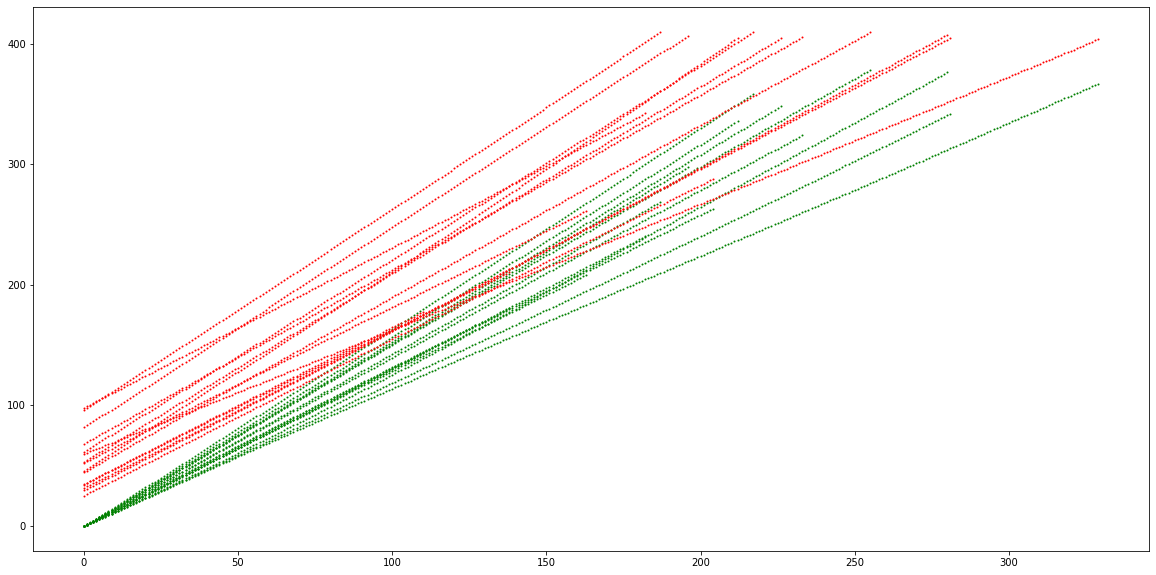

In [8]:
plt.figure(figsize=(20, 10))
plt.scatter(follow_meta['frame'], follow_meta['ego_x'], color='green', s=1)
plt.scatter(follow_meta['frame'], follow_meta['preceding_x'], color='red', s=1)
plt.show()

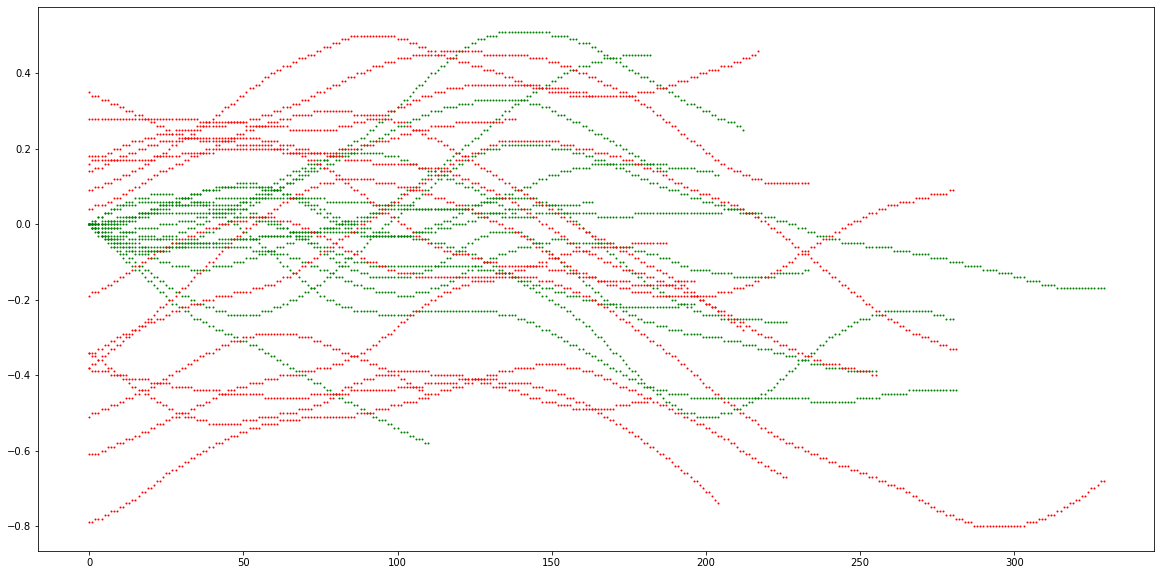

In [10]:
plt.figure(figsize=(20, 10))
plt.scatter(follow_meta['frame'], follow_meta['ego_y'], color='green', s=1)
plt.scatter(follow_meta['frame'], follow_meta['preceding_y'], color='red', s=1)
plt.show()

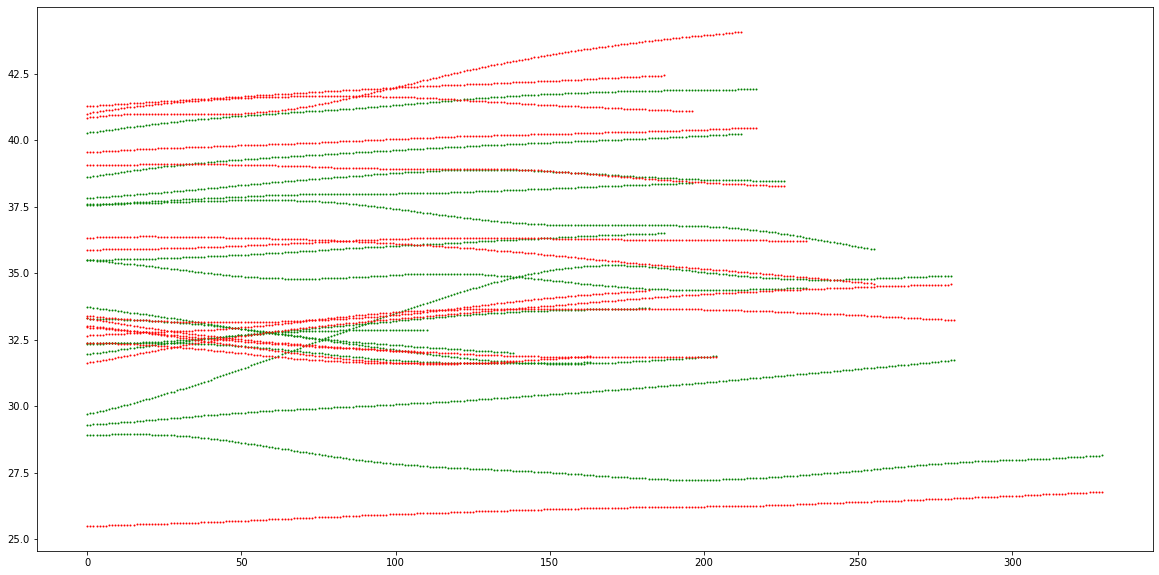

In [11]:
plt.figure(figsize=(20, 10))
plt.scatter(follow_meta['frame'], follow_meta['ego_vx'], color='green', s=1)
plt.scatter(follow_meta['frame'], follow_meta['preceding_vx'], color='red', s=1)
plt.show()

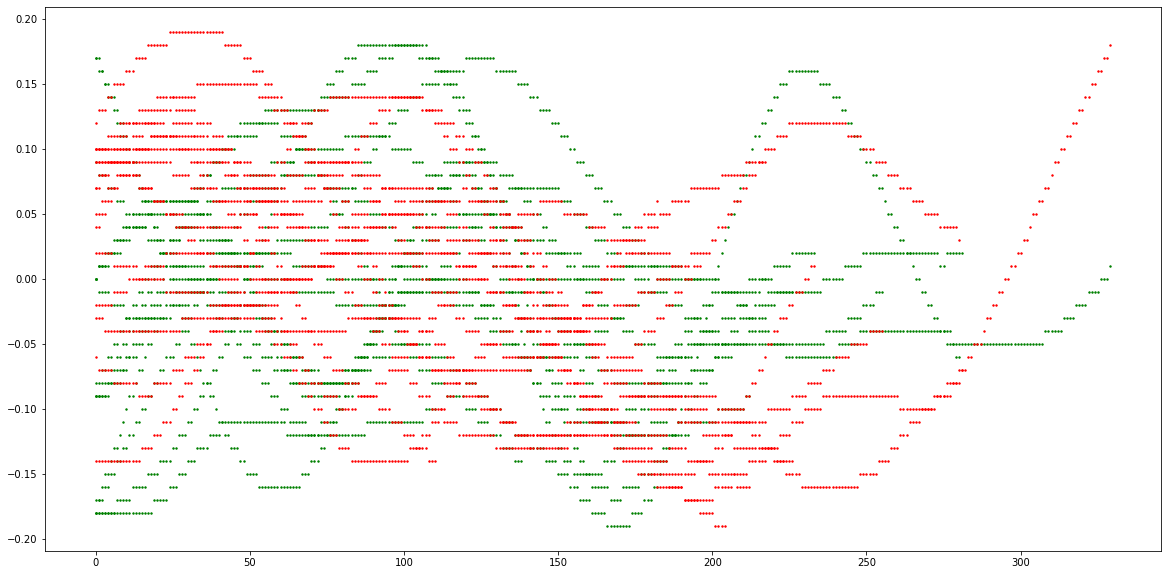

In [13]:
plt.figure(figsize=(20, 10))
plt.scatter(follow_meta['frame'], follow_meta['ego_vy'], color='green', s=2)
plt.scatter(follow_meta['frame'], follow_meta['preceding_vy'], color='red', s=2)
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
plt.scatter(follow_meta['frame'], follow_meta['ego_ax'], color='green', s=1)
plt.scatter(follow_meta['frame'], follow_meta['preceding_ax'], color='red', s=1)
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
plt.scatter(follow_meta['frame'], follow_meta['ego_ay'], color='green', s=1)
plt.scatter(follow_meta['frame'], follow_meta['preceding_ay'], color='red', s=1)
plt.show()

In [ ]:
df = follow_meta.copy()
df['ego_x_derivative'] = df['ego_x'].diff()
df['ego_y_derivative'] = df['ego_y'].diff()
df['ego_vx_derivative'] = df['ego_vx'].diff()
df['ego_vy_derivative'] = df['ego_vy'].diff()
df['ego_ax_derivative'] = df['ego_ax'].diff()
df['ego_ay_derivative'] = df['ego_ay'].diff()

df['preceding_x_derivative'] = df['preceding_x'].diff()
df['preceding_y_derivative'] = df['preceding_y'].diff()
df['preceding_vx_derivative'] = df['preceding_vx'].diff()
df['preceding_vy_derivative'] = df['preceding_vy'].diff()
df['preceding_ax_derivative'] = df['preceding_ax'].diff()
df['preceding_ay_derivative'] = df['preceding_ay'].diff()

# remove the row with frmae 0
df = df[df['frame'] != 0]

In [ ]:
plt.figure(figsize=(20, 10))
plt.scatter(df['frame'], df['ego_x_derivative'], color='green', s=1)
plt.scatter(df['frame'], df['preceding_x_derivative'], color='red', s=1)
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
plt.scatter(df['frame'], df['ego_y_derivative'], color='green', s=1)
plt.scatter(df['frame'], df['preceding_y_derivative'], color='red', s=1)
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
plt.scatter(df['frame'], df['ego_vx_derivative'], color='green', s=1)
plt.scatter(df['frame'], df['preceding_vx_derivative'], color='red', s=1)
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
plt.scatter(df['frame'], df['ego_vy_derivative'], color='green', s=1)
plt.scatter(df['frame'], df['preceding_vy_derivative'], color='red', s=1)
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
plt.scatter(df['frame'], df['ego_ax_derivative'], color='green', s=1)
plt.scatter(df['frame'], df['preceding_ax_derivative'], color='red', s=1)
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
plt.scatter(df['frame'], df['ego_ay_derivative'], color='green', s=1)
plt.scatter(df['frame'], df['preceding_ay_derivative'], color='red', s=1)
plt.show()